# Tutorial 1 - Hello World with ML

[Tutorial 1 - Hello World with Machine Learning Recipes](https://www.youtube.com/watch?v=cKxRvEZd3Mw)

Write Code that Can Tell the Difference Between an Apple and Orange


## Debian Installation
`pip install -U scikit-learn`


In [3]:
# Test that you have the sklearn library installed.

import sklearn


## Supervised Learning

Collect Training Data --> Train Classifier --> Make Predictions

For each peice of fruit, we'll collect data.  This will be training data.

Data is called "Features" and good data makes it easy to discriminate well.  The whole table is our training data.  The more data we have, the better we can discriminate.

1.  We get our data.
2.  We setup our decision tree or "classifier"



In [9]:
from sklearn import tree
features = [[140,1], [130,1], [150,0], [170,0]]  # Weight in grams;  0 is bumpy, 1 is smooth.
labels = [0,0,1,1] #0 is an apple, 1 is an orange.

clf = tree.DecisionTreeClassifier()  # Create the classifier.  This is now an empty box of rules.

# Learning algorithm is the procedure that creates the rule.  

clf = clf.fit(features, labels)

print(clf.predict([[160,0]]))  # 150 grams, and bumpy
print(clf.predict([[100,1]]))  

[1]
[0]


# Tutorial 2 - Visualize a Decision Tree

[Classifying flowers.](https://www.youtube.com/watch?v=tNa99PG8hR8&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=2) using a decision tree because . . . it's easy to see and visualize.

1. Import Dataset
2. Train a classified
3. Predict a label for the new flower.
4. Visualize the tree.


In [15]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
test_idx = [0,50,100]

# Training Data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

#Testing Data 
test_target= iris.target[test_idx]
test_data = iris.data[test_idx]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

print(test_target)
print(clf.predict(test_data))  # We give it the features, get back labels.  Predict labels for new data

# Visualization

''' 
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True,
                    rounded=True,
                    impurity=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")
'''
print(test_data[0], test_target[0])
print(iris.feature_names, iris.target_names)

[0 1 2]
[0 1 2]
[ 5.1  3.5  1.4  0.2] 0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


# What Makes a Good Feature? - Machine Learning Recipes

[Video](https://www.youtube.com/watch?v=N9fDIAflCMY&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=3) - we go over what makes a good feature.

What makes a good feature?  A good feature in binary applications is a way to easily tell between two things.
Dogs Example:  Height vs eye color.  One is useful and the other is not.  

Thought Experiment:  If you were a machine trying to figure out what you were looking at, what other things would you want to know?  hair length, speed, weight.  Number of parameters is really an art.  If a feature doesn't correlate, it's useless and can hurt the outcome of the data.  

Independent Features:  Want our features to be independent.  For example:  height in inches and height in cm are highly correlated, and might be double counted how important the features are.

*Easy to Understand Features:*  The easier to understand, the easier to build a model on.  Simpler relationships are easier to learn.


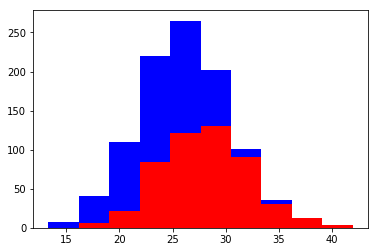

In [18]:
import numpy as np
import matplotlib.pyplot as plt

greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds)  # Make the height +/- 4 inches
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height, lab_height], stacked=True, color=['r', 'b'])
plt.show()

# Write a Pipeline

[Video](https://www.youtube.com/watch?v=84gqSbLcBFE&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=4)

Imagine a spam classifier.  One approach is to partition our dataset into two groups:  one for training and one for testing to see how it works.

In the below example, f(x) = y).  Features are x, and the labels are y.

While there are many types of classifiers, at a high level they have the same interface.  In ML we don't write the algorithm, but we let the classifier write it from a model of data.

In [22]:
# import a dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data   # Feature
y = iris.target # Label

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)  # Test size divides up the data (50% test and 50% train)

from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()   # We're using a Decision Tree Classifier

my_classifier.fit(X_train, y_train)             # We use fit with our training data to make the classifier

predictions = my_classifier.predict(X_test)     # We use the classifier on the test data.

print(predictions)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))       # Prints the percent accuracy!

##
#  Now use a KNeighbors classfier instead of decision tree.
##

from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()          # Now we'll use our KNeighbors classifier

my_classifier.fit(X_train, y_train)             # We use fit with our training data to make the classifier
predictions = my_classifier.predict(X_test)     # We use the classifier on the test data.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))       # Prints the percent accuracy!


[1 2 0 2 0 0 1 1 0 0 2 1 1 2 1 2 2 2 1 0 1 1 1 0 1 1 0 1 0 1 2 0 0 1 0 0 2
 0 2 1 2 1 1 0 1 2 2 2 1 2 0 0 0 1 2 0 1 2 2 1 0 1 0 1 0 1 0 1 2 0 2 1 2 2
 2]
0.906666666667
[1 1 0 2 0 0 1 1 0 0 2 1 1 2 1 2 2 2 1 0 1 1 1 0 1 1 0 1 0 1 2 0 0 1 0 0 2
 0 2 2 2 1 1 0 1 2 2 2 1 2 0 0 0 1 2 0 1 2 2 1 0 1 0 1 0 1 0 1 2 0 1 1 2 2
 2]
0.92


# Write our First Classifier

[Video](https://www.youtube.com/watch?v=AoeEHqVSNOw&index=5&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal)

Previous we imported the library, but in this we'll write our own classifier. 

First we make a class to cover this. Measure the euclidean distance between points. Euclidean distance measure around as many dimensions as we can add.

In [29]:
import random
from scipy.spatial import distance

# Measure the euclidean distance. 
def euc(a,b):
    return distance.euclidean(a,b)

# This classifier will work based on the euclidean distance, and try to find a short distance.
class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)  # Implement the closesest neighbor.
            predictions.append(label)
        return predictions
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])  # Calculate the first test point.
        best_index = 0
        for i in range(1, len(self.X_train)):  # ITerate over all the other training points and update when we find somethign closer.
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.y_train[best_index]
            
# import a dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data   # Feature
y = iris.target # Label

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)  # Test size divides up the data (50% test and 50% train)

##
#  Now use a KNeighbors classfier instead of decision tree.
##

#  from sklearn.neighbors import KNeighborsClassifier
my_classifier = ScrappyKNN()

# my_classifier = KNeighborsClassifier()          # Now we'll use our KNeighbors classifier

my_classifier.fit(X_train, y_train)             # We use fit with our training data to make the classifier
predictions = my_classifier.predict(X_test)     # We use the classifier on the test data.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))       # Prints the percent accuracy!


0.973333333333
